<a href="https://colab.research.google.com/github/dzakaddodle/programming_project/blob/updated-as-of-28-feb-3am/pandas_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
API_KEY = "hgVAQPj8NKeoMoaXKyVjI9cqontuWz18p7nGcsKj"

In [4]:
#user enter stock symbol
STOCK_SYMBOL = input("Enter stock ticker: ").strip().upper()

#display monthly data for past 12 months
INTERVAL = "month"
DATE_TO = datetime.today().strftime("%Y-%m-%d")
DATE_FROM = (datetime.today() - timedelta(days=365)).strftime("%Y-%m-%d")

#API Endpoint
URL = (
    f"https://api.stockdata.org/v1/data/eod"
    f"?symbols={STOCK_SYMBOL}"
    f"&api_token={API_KEY}"
    f"&interval={INTERVAL}"
    f"&date_from={DATE_FROM}"
    f"&date_to={DATE_TO}"
    f"&sort=asc"
)

Enter stock ticker: AAPL


In [5]:
response = requests.get(URL)
data = response.json()

In [6]:
df = pd.DataFrame(data["data"])

In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df = df.sort_values(by="date")

In [13]:
print(df.head())  # Check the first few rows of data
print(df.tail())  # Check the last few rows of data


                       date    open    high     low   close   volume  SMA_10
0 2024-03-01 00:00:00+00:00  179.56  180.48  177.38  179.62  1181566     NaN
1 2024-03-04 00:00:00+00:00  176.11  176.85  173.79  175.09  1703322     NaN
2 2024-03-05 00:00:00+00:00  170.80  172.02  169.64  170.15  1460142     NaN
3 2024-03-06 00:00:00+00:00  171.21  171.23  168.71  169.13   906720     NaN
4 2024-03-07 00:00:00+00:00  169.23  170.70  168.50  168.96  1215467     NaN
                         date    open    high     low   close  volume   SMA_10
120 2024-08-22 00:00:00+00:00  227.84  228.33  223.91  224.70  750001  223.057
121 2024-08-23 00:00:00+00:00  225.79  228.22  224.36  226.83  746107  224.124
122 2024-08-26 00:00:00+00:00  226.75  227.27  223.93  227.24  537251  225.090
123 2024-08-27 00:00:00+00:00  226.21  228.85  224.89  228.13  580021  225.794
124 2024-08-28 00:00:00+00:00  228.02  229.85  225.70  226.40  666048  226.269


Text(0.5, 1.0, 'AAPL Historical Stock Prices (Last 12 months)')

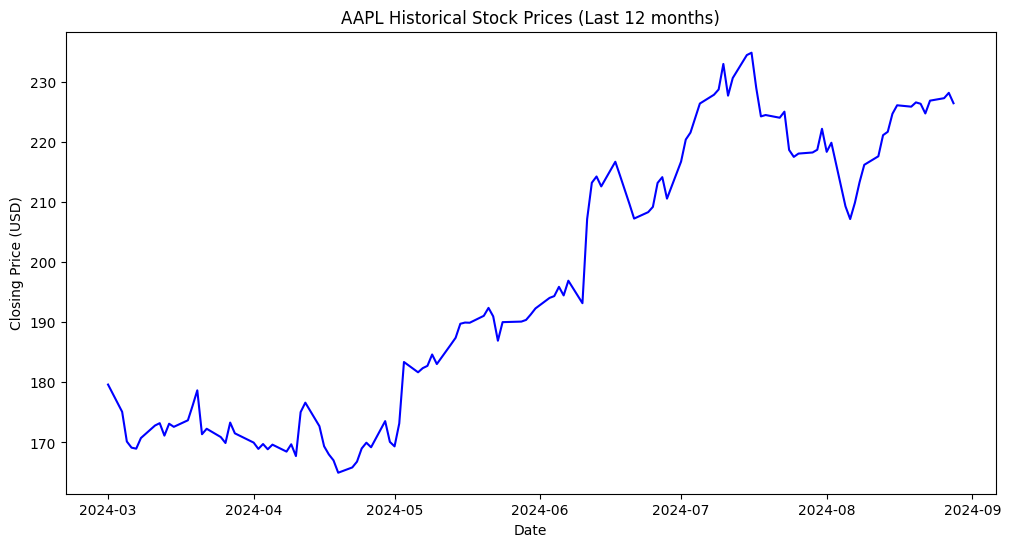

In [15]:
#unable to display past twelve months as latest data from API is from 2024-08-28
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["close"], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title(f"{STOCK_SYMBOL} Historical Stock Prices (Last 12 months)")